# Parkinsons Logistic Regression.

## Import Libraries

In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

## Step1: Dataset

In [723]:
# URL ของ dataset บน UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

# โหลดข้อมูลเข้า Pandas DataFrame
df1 = pd.read_csv(url)
df1

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [724]:
df1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


##Step2: EDA, Datapreparation

In [725]:
#copy data1 มาใส่ data2
df2 = df1.copy()

In [726]:
''' ทำการ info เพื่อดูสรุปเกี่ยวกับ DataFrame พบว่า status ซึ่งเอาไว้แสดงสถานะ การเป็นโรค
    พากินสัน เป็น int จึงทำการเปลี่่ยนเป็น catagory จากนั้นขยับ column ไปไว้ column ไปไว้
    ที่ท้ายสุดของ Dataframe และทำการลบ column name ออก จากนั้น info ดู dataframe อีกรอบว่าถูกต้อง'''

df2.info()
df2['status'] = df2['status'].astype('category')
y = df2['status']
df2 = df2.drop(['status'], axis = 1)
df2 = df2.drop(['name'], axis =1)
df2['status'] = y
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [727]:
# ทำการเช็ค ดูข้อมูลใน Dataframe ว่าแต่ละ column มีข้อมูลขาดหายหรือไม่  พบว่า Dataset นี้ไม่มีข้อมูลขาดหาย
df2.isnull().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


In [728]:
#ทำการ df2.describe เพื่อดูข้อมูล พบว่ามีข้อมูลที่ Min-Max ห่างกันเกินไป ดังนั้นจะทำการกำจัด outlier โดยการใช้ วิธี IQR ในการกำจัด
df2.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Axes: >

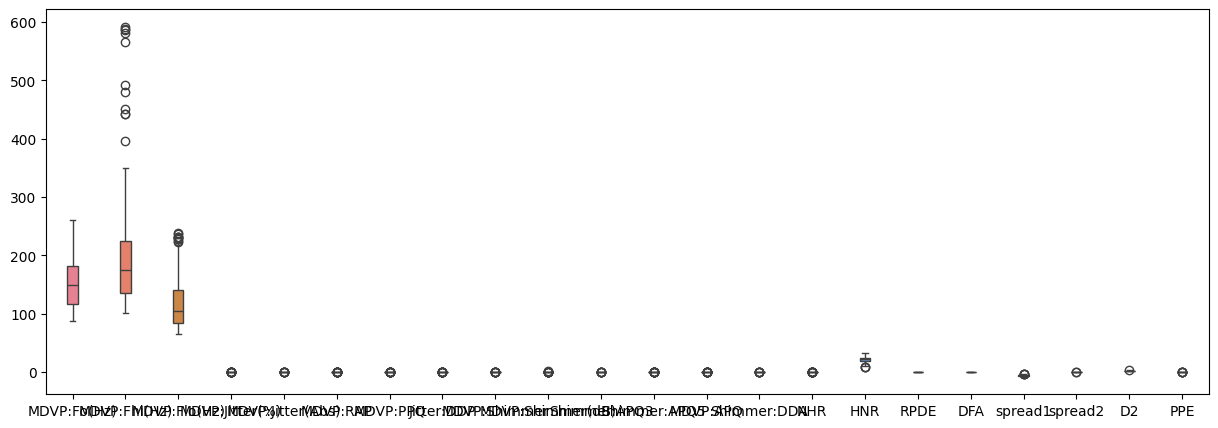

In [729]:
#boxplot เพื่อดูแนวโน้มการกระจายของค่า สังเกตุว่ามี outlier จำนวนมาก จากทั้ง feature ทั้ง 23 column
plt.figure(figsize=(15,5))
sns.boxplot(df2,width=0.2)

In [730]:
# ทำการ copy df2 ลงใน df3 เพื่อที่จะ เอา df3 ไปใช้ คัด outlier ออก
df3 = df2.copy()

In [731]:
# สร้าง Function สำหรับการ กรอง Outlier ในข้อมูลออก ให้เหลืออยู่ใน ระดับ % ที่ต้องการ
def remove_outliers(df3,percent_accept):

    x_ol = df3.drop(['status'],axis = 1)
    y_ol = df3['status']

    while True:

        q1 = np.quantile(x_ol, 0.25, axis=0)
        q2 = np.quantile(x_ol, 0.50, axis=0)
        q3 = np.quantile(x_ol, 0.75, axis=0)
        iqr = q3 - q1
        lower_limit = q1 - 1.5*iqr
        upper_limit = q3 + 1.5*iqr

        count_not_outlier = 0
        count_outlier = 0

        for i in range(len(x_ol)):
            if  np.all((x_ol.iloc[i,:] >= lower_limit) & (x_ol.iloc[i,:] <= upper_limit)):
                count_not_outlier += 1
            else :
                count_outlier += 1

        percent_outlier = count_outlier/(count_not_outlier+count_outlier)*100

        if  percent_outlier <= percent_accept:
            break

        else :
            mask = np.all((x_ol >= lower_limit) & (x_ol <= upper_limit), axis=1)
            x_ol = x_ol[mask]
            y_ol = y_ol[mask]

    df3 =  pd.concat([x_ol,y_ol],axis=1)
    return df3

In [732]:
#กำจัด outlier ด้วยการเรียกใช้ function ที่ได้สร้างไว้
df3 = remove_outliers(df3,10)
df3


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.163,...,0.02429,0.01179,22.085,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404,0
185,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,0.136,...,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346,0
188,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.01672,0.00703,24.775,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777,0
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0


In [733]:
# หลังจาก คัด outlier ออกแล้ว ต่อมาทำการ describe ข้อมูลดูข้อมูล พบว่าข้อมูลมีการกระจายที่น้อยลงมาก
df3.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,146.595224,169.175400,112.370952,0.004742,0.000035,0.002422,0.002622,0.007267,0.023526,0.216424,...,0.019019,0.037128,0.011674,23.291304,0.488018,0.728552,-5.923958,0.213027,2.273476,0.187717
std,36.603643,42.167277,34.015972,0.001957,0.000018,0.001151,0.001126,0.003453,0.010283,0.097355,...,0.008448,0.017258,0.008639,3.512090,0.101347,0.050564,0.802091,0.064285,0.326330,0.064796
min,91.904000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,15.924000,0.263654,0.574282,-7.964984,0.063412,1.423287,0.044539
25%,116.286000,131.067000,86.795000,0.003310,0.000020,0.001570,0.001820,0.004710,0.015160,0.137000,...,0.012850,0.022610,0.004870,20.536000,0.405991,0.693429,-6.452058,0.177551,2.027228,0.141422
50%,140.341000,162.408000,104.773000,0.004360,0.000030,0.002090,0.002330,0.006280,0.021450,0.197000,...,0.017150,0.034640,0.009050,23.216000,0.482296,0.732903,-5.898673,0.210279,2.269398,0.184067
75%,174.188000,202.450000,132.857000,0.006050,0.000050,0.003210,0.003320,0.009620,0.031110,0.275000,...,0.024440,0.048120,0.017940,25.742000,0.576084,0.763262,-5.409423,0.254909,2.489191,0.231571
max,252.455000,271.314000,197.079000,0.009750,0.000080,0.005930,0.005540,0.017780,0.049780,0.483000,...,0.043700,0.082470,0.038280,33.047000,0.685151,0.821364,-4.330956,0.363566,3.098256,0.344834


<Axes: >

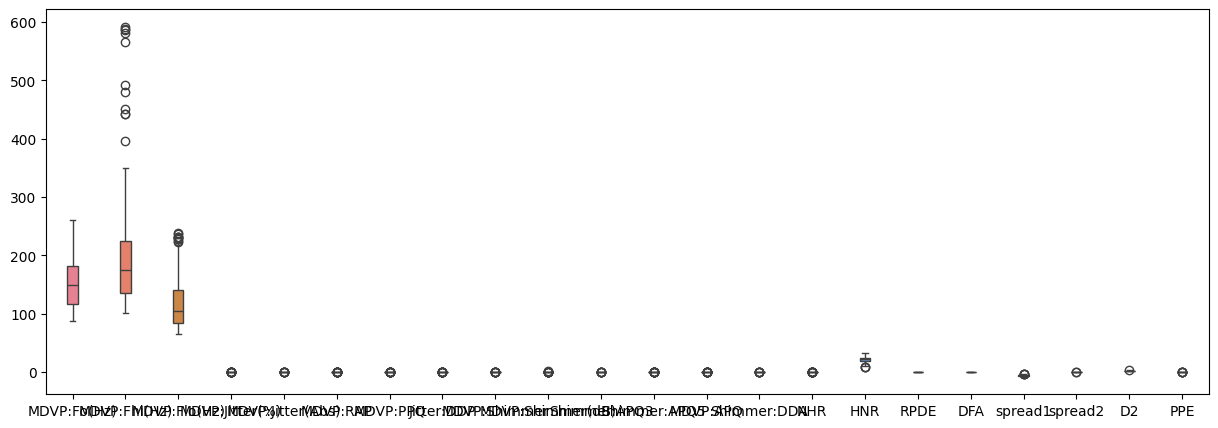

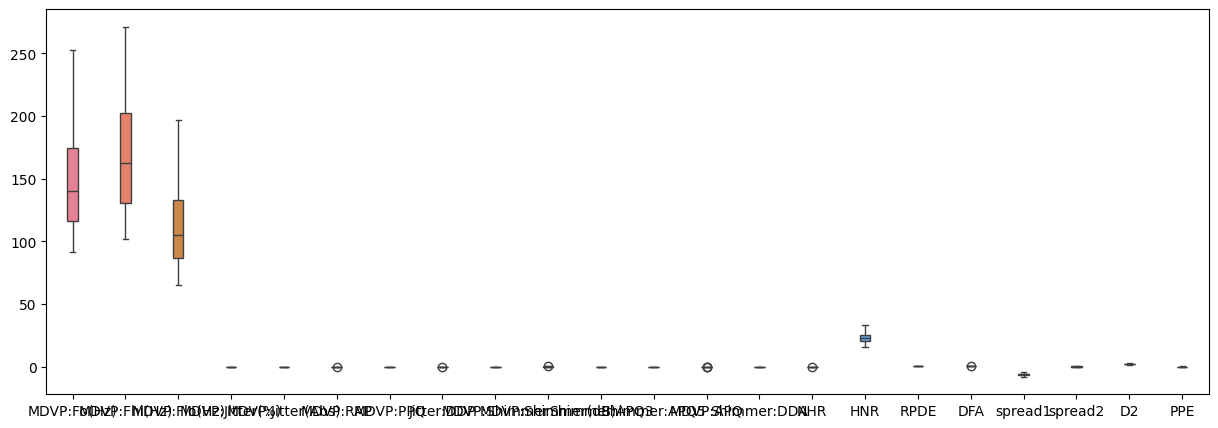

In [734]:
# Boxplot เพื่อดูการกระจาย ของข้อมูลก่อน คัด outlier ออก และหลังคัด outlier ออก ได้ดังรูป จะเห็นว่า outlier หายไปเยอะมาก
plt.figure(figsize=(15,5))
sns.boxplot(df2,width=0.2)

plt.figure(figsize=(15,5))
sns.boxplot(df3,width=0.2)


In [735]:
#ทำการปรับข้อมูลให้อยู่ในรูปมาตราฐานเดียวกัน โดยใช้ การแปลงเป็น z-score เพื่อให้ นำไปใช้คำนวณ model ได้ค่าที่แม่นยำ

mean = df3.drop(['status'],axis=1).mean()
std = df3.drop(['status'],axis=1).std()

z = (df3.drop(['status'],axis=1)-mean)/std
z['status']  = df2['status']
df3  = z.copy()
df3

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.726792,-0.281579,-1.098718,1.582591,1.872172,1.109766,2.592302,1.107134,1.965796,2.152707,...,1.641046,1.208024,-0.643009,-0.722615,1.715337,1.385038,0.831535,0.085700,1.496025,1
6,-0.719279,-0.757255,0.071997,-0.721667,-0.297205,-0.757445,-0.534464,-0.755158,-0.724160,-0.785006,...,-0.797200,-0.648694,0.454059,1.065859,0.703284,0.361102,0.694645,-1.283028,0.370995,1
7,-1.072659,-1.312283,-0.236829,-0.941363,-0.297205,-0.852976,-0.712121,-0.856526,-0.764033,-0.846637,...,-0.710285,-0.953130,1.025229,1.474158,0.686473,-0.303762,-0.455872,-0.639790,-0.369802,1
8,-1.389622,-0.880005,-0.606096,0.392143,1.329828,0.441044,0.620308,0.443891,-0.252494,-0.261148,...,-0.286721,-0.112746,-0.421203,1.258375,0.890672,0.530214,1.784899,0.150263,0.676798,1
9,-1.408035,-1.163755,-0.621618,0.295068,1.329828,0.223926,0.620308,0.220880,0.472024,0.396242,...,0.354130,-0.168308,-0.406967,0.582343,1.382647,1.137127,1.757318,0.488206,1.290890,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-0.812685,1.147255,-0.378291,0.289958,0.787484,0.154449,0.744668,0.154266,-0.542302,-0.548757,...,-0.743892,0.013428,-0.343472,1.734865,-1.424654,0.904005,-0.097359,-0.469045,0.998312,0
185,-0.828038,0.192462,-0.452374,-0.818742,-0.297205,-0.939823,-0.623292,-0.937622,-0.766951,-0.826093,...,-0.991888,-0.498211,0.258449,1.090280,-1.467867,0.413138,-1.230609,-0.658283,0.410966,0
188,-0.875110,-1.185953,-0.756232,-0.752322,-0.297205,-0.835607,-0.694355,-0.833356,-1.135531,-1.134245,...,-1.182521,-0.537568,0.422454,0.663904,-1.372917,-0.980263,-0.985186,-1.101601,-1.017645,0
190,0.753826,1.465653,-0.532396,-0.077905,-0.297205,0.180503,-0.028141,0.183229,1.686687,1.937001,...,1.909322,1.848151,-1.074660,-0.390529,-1.397302,-0.766281,-1.416733,1.176724,-0.843670,0


In [736]:
# จาก การทำdata preparation ที่ผ่านมาเราได้ทำการแปลง dataset column'status' เป็น catagory และทำการย้ายมาอยู่ column ท้ายสุด และลบ column 'name' ออก
# จากนั้นทำการจัดการ outlier ด้วยวิธี Iqr และสุดท้ายทำการแปลงข้ามูลทั้งหมดใน data set ให้เป็น z-score
#ทำให้ได้ Dataset ที่พร้อมนำไปทำการ Train medel ดังที่แสดงให้ดูด้านล่าง
df3

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.726792,-0.281579,-1.098718,1.582591,1.872172,1.109766,2.592302,1.107134,1.965796,2.152707,...,1.641046,1.208024,-0.643009,-0.722615,1.715337,1.385038,0.831535,0.085700,1.496025,1
6,-0.719279,-0.757255,0.071997,-0.721667,-0.297205,-0.757445,-0.534464,-0.755158,-0.724160,-0.785006,...,-0.797200,-0.648694,0.454059,1.065859,0.703284,0.361102,0.694645,-1.283028,0.370995,1
7,-1.072659,-1.312283,-0.236829,-0.941363,-0.297205,-0.852976,-0.712121,-0.856526,-0.764033,-0.846637,...,-0.710285,-0.953130,1.025229,1.474158,0.686473,-0.303762,-0.455872,-0.639790,-0.369802,1
8,-1.389622,-0.880005,-0.606096,0.392143,1.329828,0.441044,0.620308,0.443891,-0.252494,-0.261148,...,-0.286721,-0.112746,-0.421203,1.258375,0.890672,0.530214,1.784899,0.150263,0.676798,1
9,-1.408035,-1.163755,-0.621618,0.295068,1.329828,0.223926,0.620308,0.220880,0.472024,0.396242,...,0.354130,-0.168308,-0.406967,0.582343,1.382647,1.137127,1.757318,0.488206,1.290890,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-0.812685,1.147255,-0.378291,0.289958,0.787484,0.154449,0.744668,0.154266,-0.542302,-0.548757,...,-0.743892,0.013428,-0.343472,1.734865,-1.424654,0.904005,-0.097359,-0.469045,0.998312,0
185,-0.828038,0.192462,-0.452374,-0.818742,-0.297205,-0.939823,-0.623292,-0.937622,-0.766951,-0.826093,...,-0.991888,-0.498211,0.258449,1.090280,-1.467867,0.413138,-1.230609,-0.658283,0.410966,0
188,-0.875110,-1.185953,-0.756232,-0.752322,-0.297205,-0.835607,-0.694355,-0.833356,-1.135531,-1.134245,...,-1.182521,-0.537568,0.422454,0.663904,-1.372917,-0.980263,-0.985186,-1.101601,-1.017645,0
190,0.753826,1.465653,-0.532396,-0.077905,-0.297205,0.180503,-0.028141,0.183229,1.686687,1.937001,...,1.909322,1.848151,-1.074660,-0.390529,-1.397302,-0.766281,-1.416733,1.176724,-0.843670,0


##Step3: Model building

In [737]:
# copy df3 มาใส่ df4 เพื่อที่จะเอา df4 ไปทำการ สร้าง model Binomial Logistic Regression
df4 = df3.copy()
# แยก feature กับ target โดยใช้ feature ทั้งหมด
x_t = df4.drop(['status'],axis = 1)
y_t = df4['status']
y_t.unique()

[1, 0]
Categories (2, int64): [0, 1]

In [738]:
# ทำการ Train
x_train,x_test,y_train,y_test = train_test_split(x_t,y_t,test_size=0.2,random_state=25)
model = LogisticRegression()
model = model.fit(x_train,y_train)
print(model.intercept_)
print()
print(model.coef_)

[1.85331323]

[[ 0.12008869 -0.25329543  0.11158585 -0.35331554 -0.61321002  0.56456765
  -0.22886586  0.56036918  0.00356386 -0.03424564 -0.22038634 -0.27589191
   0.5468336  -0.22100161  0.63358255 -0.16030237 -0.3617855   0.30663655
   0.70768388  0.50985585  0.55636689  0.45525048]]


In [739]:
# Simple linear regression ineach 2 class
b0 = model.intercept_[0]
b1 = model.coef_[0,0]
b2 = model.coef_[0,1]
b3 = model.coef_[0,2]
b4 = model.coef_[0,3]
b5 = model.coef_[0,4]
b6 = model.coef_[0,5]
b7 = model.coef_[0,6]
b8 = model.coef_[0,7]
b9 = model.coef_[0,8]
b10 = model.coef_[0,9]
b11 = model.coef_[0,10]
b12 = model.coef_[0,11]
b13 = model.coef_[0,12]
b14 = model.coef_[0,13]
b15 = model.coef_[0,14]
b16 = model.coef_[0,15]
b17 = model.coef_[0,16]
b18 = model.coef_[0,17]
b19 = model.coef_[0,18]
b20 = model.coef_[0,19]
b21 = model.coef_[0,20]
b22 = model.coef_[0,21]

print('Simple linear ---->  %.4f + %.4fx1 + %.4fx2 + %.4fx3 + %.4fx4 + %.4fx5 + %.4fx6 + %.4fx7 + %.4fx8 + %.4fx9 + %.4fx10 + %.4fx11 + %.4fx12 + %.4fx13 + %.4fx14 + %.4fx15 + %.4fx16 + %.4fx17 + %.4fx18 + %.4fx19 + %.4fx20 + %.4fx21 + %.4fx22'%(b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19,b20,b21,b22))


Simple linear ---->  1.8533 + 0.1201x1 + -0.2533x2 + 0.1116x3 + -0.3533x4 + -0.6132x5 + 0.5646x6 + -0.2289x7 + 0.5604x8 + 0.0036x9 + -0.0342x10 + -0.2204x11 + -0.2759x12 + 0.5468x13 + -0.2210x14 + 0.6336x15 + -0.1603x16 + -0.3618x17 + 0.3066x18 + 0.7077x19 + 0.5099x20 + 0.5564x21 + 0.4553x22


##Step4: Results and Evaluation

In [740]:
# Predict test set to output 0's and 1's.
y_pred = model.predict(x_test)
print(y_pred)

# Use predict_proba to output a probability
# 0 ไม่เป็น Parkinsons , 1 เป็น Parkinsons
y_pred_prob = model.predict_proba(x_test)
print(y_pred_prob.round(4))

[1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[0.042  0.958 ]
 [0.4865 0.5135]
 [0.0721 0.9279]
 [0.4333 0.5667]
 [0.6647 0.3353]
 [0.0833 0.9167]
 [0.5123 0.4877]
 [0.6524 0.3476]
 [0.2355 0.7645]
 [0.8536 0.1464]
 [0.2275 0.7725]
 [0.0602 0.9398]
 [0.2002 0.7998]
 [0.0706 0.9294]
 [0.0543 0.9457]
 [0.2265 0.7735]
 [0.7483 0.2517]
 [0.0551 0.9449]
 [0.0272 0.9728]
 [0.0212 0.9788]
 [0.034  0.966 ]
 [0.0132 0.9868]
 [0.0092 0.9908]
 [0.4056 0.5944]
 [0.4404 0.5596]]


In [741]:
# Updated dataframe for x_test
df4 = x_test.copy()
df4['status_test'] = y_test
df4['status_pred'] = y_pred
df4['prob-0'] = y_pred_prob[:,0]
df4['prob-1'] = y_pred_prob[:,1]
df4.round(4)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,RPDE,DFA,spread1,spread2,D2,PPE,status_test,status_pred,prob-0,prob-1
57,-0.8010,-0.9310,-0.0579,1.4191,1.3298,0.4932,1.8373,0.4960,-0.0580,0.0470,...,0.4195,1.7642,1.6403,1.1977,-0.7719,1.9561,1,1,0.0420,0.9580
49,-0.6456,-0.9279,0.0678,-0.2363,-0.2972,-1.0267,-0.9520,-1.0245,-0.6532,-0.6412,...,0.5000,0.5047,-0.6959,0.8080,-0.6713,-0.9081,0,1,0.4865,0.5135
58,-0.8118,-0.8841,-0.1240,1.6030,1.8722,0.7971,2.0504,0.8001,0.2843,0.4990,...,0.5134,1.6787,1.8043,0.7717,-1.3681,2.1372,1,1,0.0721,0.9279
51,-0.5533,-0.8287,0.0118,-0.1341,0.2451,-0.9659,-0.8276,-0.9666,-0.3108,-0.3228,...,0.1923,0.6291,-0.9540,1.2278,0.4853,-1.2612,0,1,0.4333,0.5667
50,-0.6051,-0.8088,0.1506,-0.2210,-0.2972,-0.8790,-0.8454,-0.8826,-0.1640,-0.1995,...,0.6425,0.9371,-0.9058,0.6451,-1.3277,-1.2988,0,0,0.6647,0.3353
75,-0.9805,-1.1043,-0.2165,0.2133,0.7875,0.3021,0.2383,0.3020,-0.1338,-0.1071,...,-0.2418,1.5558,0.5565,1.5874,-1.2606,0.6313,1,1,0.0833,0.9167
83,-1.3056,-1.5858,-0.7222,-0.2159,0.2451,0.0415,-0.0370,0.0442,-0.1261,-0.1482,...,0.8745,0.8675,-0.1264,-2.0973,-0.6738,-0.1611,1,0,0.5123,0.4877
12,-0.2642,-0.2208,0.5558,-0.9260,-0.8395,-1.0788,-0.9697,-1.0766,-1.0636,-1.0726,...,-0.2705,-1.6159,-0.7770,-0.9367,-0.7115,-0.7594,1,0,0.6524,0.3476
125,-0.0388,0.6862,-0.9329,1.3220,0.7875,1.4919,1.4198,1.4923,0.0091,0.1703,...,1.4751,0.1383,0.4110,-1.3234,-1.5552,0.5401,1,1,0.2355,0.7645
32,1.4148,1.0915,2.3734,-1.3399,-1.3819,-1.1222,-1.1296,-1.1230,-1.0597,-1.0829,...,-0.2178,0.2008,-1.4262,-0.5887,-2.3326,-1.4105,0,0,0.8536,0.1464


              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.85      0.89      0.87        19

    accuracy                           0.80        25
   macro avg       0.72      0.70      0.71        25
weighted avg       0.79      0.80      0.79        25



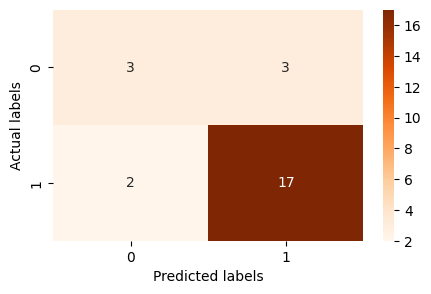

In [742]:
# Classification report
print(classification_report(y_test, y_pred, target_names=[str(c) for c in model.classes_]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [743]:
#***
# Encode the categorical labels into numeric values
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

print('Accuracy: %.4f' % accuracy_score(y_test_encoded, y_pred_encoded))

# Compute Precision, Recall, and F1 Score with multiclass support
print('Precision: %.4f' % precision_score(y_test_encoded, y_pred_encoded, average='macro'))
print('Recall: %.4f' % recall_score(y_test_encoded, y_pred_encoded, average='macro'))
print('F1 Score: %.4f' % f1_score(y_test_encoded, y_pred_encoded, average='macro'))


Accuracy: 0.8000
Precision: 0.7250
Recall: 0.6974
F1 Score: 0.7086


# อภิปลายผล

In [ ]:
'''
จากผลการ ทดลองเพื่อสร้าง model Binomial Logistic Regression เพื่อที่จะใช้ทำนายว่าบุคคลใดมีโอกาสเป็น โรค Parkinsons
โดยขั้นตอนหลักๆ มีอยู่ 4 ส่วน
    1.ทำการ นำเข้า Dataset มาจาก uci.edu
    2.ทำการ Datapreparation , Visualization เพื่อทำให้ข้อมูลมีความเหมาะสมก่อนนำไปทำการ Train model ประกอบด้วย
      การจัดการกับข้อมูลที่สูญหาย,การเปลี่ยนชนิดข้อมูลให้เหมาะสม (Numeric data-> Categorical data),การกำจัดข้อมูล Outlier โดยการใช้ IQR,
      และ การทำให้อยู่ในรูปมาตรฐานโดยการแปลงเป็น Z-score
    3.การสร้าง model โดยใช้ sklearn ในการสร้าง model Binomial Logistic Regression
    4.การ ประเมินประสิทภาพ model Result and Evaluation ได้ค่า
      Accuracy: 0.8000
      Precision: 0.7250
      Recall: 0.6974
      F1 Score: 0.7086
'''